# Lógica do Segundo Exercício da Apostila

**Aluno:** Rafael Lúcio Negrão Cordeiro<br/>
**Matrícula:** 201310323<br/>
**Disciplina:** CET961 - Engenharia Assistida por Computador

In [1]:
import numpy as np

A1 = 32.3 # cm²
A2 = 38.7 # cm²
A3 = 25.8 # cm²

A = [A1, A2, A3] # Compactaçao dos valores de área em vetor

E1 = 6.9e10  # N / m
E2 = 20.7e10 # N / m
E3 = 20.7e10 # N / m

E = [E1, E2, E3] # Compactaçao dos módulos de elasticidade em vetor

L1 = 2.54 # m
L2 = 2.54 # m
L3 = 3.59 # m

L = [L1, L2, L3] # Compactaçao dos comprimentos em vetor

con1 = (2, 3)
con2 = (1, 2)
con3 = (1, 3)

alpha = np.array([90, 0, 135]) # Vetor criado com angulos em graus

F = 100e3 # kN
Fx = F * np.cos(225 * np.pi / 180) # 225 * np.pi / 180 é o angulo de 225 em radianos
Fy = F * np.sin(225 * np.pi / 180)

#### Compondo o sistema na notaçao matricial $[K_{i}^{(g)}]\{U_{i}^{(g)}\} = \{F_{i}^{(g)}\}$, temos:

$$
\begin{split}
    \overbrace{
        \begin{bmatrix}
            k_{1 x 1 (i)} & k_{1 x 2 (i)} & k_{1 x 3 (i)} & k_{1 x 4 (i)}\\
            k_{2 x 1 (i)} & k_{2 x 2 (i)} & k_{2 x 3 (i)} & k_{2 x 4 (i)}\\
            k_{3 x 1 (i)} & k_{3 x 2 (i)} & k_{3 x 3 (i)} & k_{3 x 4 (i)}\\
            k_{4 x 1 (i)} & k_{4 x 2 (i)} & k_{4 x 3 (i)} & k_{4 x 4 (i)}
        \end{bmatrix}
    }^{[K^{(g)}_i]}
    \overbrace{
        \begin{Bmatrix}
            u_{iX}^E\\
            u_{iY}^E\\
            u_{iX}^D\\
            u_{iY}^D
        \end{Bmatrix}
    }^{\{U^{(g)}_i\}}
    =
    \overbrace{
        \begin{Bmatrix}
            F_{iX}^{E}\\
            F_{iY}^{E}\\
            F_{iX}^{D}\\
            F_{iY}^{D}
        \end{Bmatrix}
    }^{\{F^{(g)}_i\}}\\
    \overbrace{
        \frac{E_iA_i}{L_i}
        \begin{bmatrix}
            \cos^2\alpha_i & \cos\alpha_i\sin\alpha_i & -\cos^2\alpha_i & -\cos\alpha_i\sin\alpha_i\\
            \cos\alpha_i\sin\alpha_i & \sin^2\alpha_i & -\cos\alpha_i\sin\alpha_i & -\sin^2\alpha_i\\
            -\cos^2\alpha_i & -\cos\alpha_i\sin\alpha_i & \cos^2\alpha_i & \cos\alpha_i\sin\alpha_i\\
            -\cos\alpha_i\sin\alpha_i & -\sin^2\alpha_i & \cos\alpha_i\sin\alpha_i & \sin^2\alpha_i
        \end{bmatrix}
    }^{[K^{(g)}_i]}
    \overbrace{
        \begin{bmatrix}
            \cos\alpha_i & 0\\
            \sin\alpha_i & 0\\
            0 & \cos\alpha_i\\
            0 & \sin\alpha_i
        \end{bmatrix}
        \begin{Bmatrix}
            u_{i}^E\\
            u_{i}^D
        \end{Bmatrix}
    }^{\{U^{(g)}_i\}}=
    \overbrace{
        \begin{bmatrix}
            \cos\alpha_i & 0\\
            \sin\alpha_i & 0\\
            0 & \cos\alpha_i\\
            0 & \sin\alpha_i
        \end{bmatrix}
        \begin{Bmatrix}
            F_{i}^E\\
            F_{i}^D
        \end{Bmatrix}
    }^{\{F^{(g)}_i\}}
\end{split}
$$

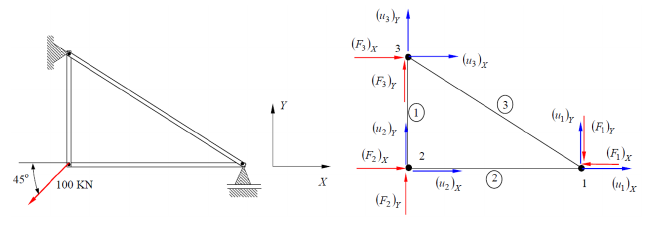

$u_{1X}^E = u_{3X}^E$, $u_{1Y}^E = u_{3Y}^E$


$u_{1X}^D = u_{2X}^E$, $u_{1Y}^D = u_{2Y}^E$

$u_{2X}^D = u_{3X}^D$, $u_{2Y}^D = u_{3Y}^D$

Se $\frac{E_1A_1}{L_1} = 8.77e7$, $\frac{E_2A_2}{L_2} = 3.15e8$, $\frac{E_3A_3}{L_3} = 1.49e8$

 - Elemento 1:$$K_1 = 
\frac{E_1A_1}{L_1}
\begin{bmatrix}
    0 & 0 & 0 & 0\\
    0 & 1 & 0 & -1\\
    0 & 0 & 0 & 0\\
    0 & -1 & 0 & 1
\end{bmatrix}
\begin{Bmatrix}
    u_{1X}^E\\
    u_{1Y}^E\\
    u_{1X}^D\\
    u_{1Y}^D
\end{Bmatrix}
\Rightarrow
\frac{E_1A_1}{L_1}
\begin{bmatrix}
    0 & 0 & 0 & 0\\
    0 & 1 & 0 & -1\\
    0 & 0 & 0 & 0\\
    0 & -1 & 0 & 1
\end{bmatrix}
\begin{Bmatrix}
    u_{3X}^E\\
    u_{3Y}^E\\
    u_{1X}^D\\
    u_{1Y}^D
\end{Bmatrix}
\Rightarrow
se \frac{E_1A_1}{L_1} = 8.77e7 \Rightarrow
10^7
\begin{bmatrix}
    0 & 0 & 0 & 0\\
    0 & 8.77 & 0 & -8.77\\
    0 & 0 & 0 & 0\\
    0 & -8.77 & 0 & 8.77
\end{bmatrix}
\begin{Bmatrix}
    u_{3X}^E\\
    u_{3Y}^E\\
    u_{1X}^D\\
    u_{1Y}^D
\end{Bmatrix}
 $$

 - Elemento 2:$$
 K_2 = 
\frac{E_2A_2}{L_2}
\begin{bmatrix}
    1 & 0 & -1 & 0\\
    0 & 0 & 0 & 0\\
    -1 & 0 & 1 & 0\\
    0 & 0 & 0 & 0
\end{bmatrix}
\begin{Bmatrix}
    u_{2X}^E\\
    u_{2Y}^E\\
    u_{2X}^D\\
    u_{2Y}^D
\end{Bmatrix}
\Rightarrow
\frac{E_2A_2}{L_2}
\begin{bmatrix}
    1 & 0 & -1 & 0\\
    0 & 0 & 0 & 0\\
    -1 & 0 & 1 & 0\\
    0 & 0 & 0 & 0
\end{bmatrix}
\begin{Bmatrix}
    u_{1X}^D\\
    u_{1Y}^D\\
    u_{2X}^D\\
    u_{2Y}^D
\end{Bmatrix}
\Rightarrow
se \frac{E_2A_2}{L_2} = 3.15e8 \Rightarrow
10^7
\begin{bmatrix}
    31.5 & 0 & -31.5 & 0\\
    0 & 0 & 0 & 0\\
    -31.5 & 0 & 31.5 & 0\\
    0 & 0 & 0 & 0
\end{bmatrix}
\begin{Bmatrix}
    u_{1X}^D\\
    u_{1Y}^D\\
    u_{2X}^D\\
    u_{2Y}^D
\end{Bmatrix}
 $$

 - Elemento 3:$$
 K_3 = 
\frac{E_3A_3}{L_3}
\begin{bmatrix}
    0.5 & -0.5 & -0.5 & 0.5\\
    -0.5 & 0.5 & 0.5 & -0.5\\
    -0.5 & 0.5 & 0.5 & -0.5\\
    0.5 & -0.5 & -0.5 & 0.5
\end{bmatrix}
\begin{Bmatrix}
    u_{3X}^E\\
    u_{3Y}^E\\
    u_{3X}^D\\
    u_{3Y}^D
\end{Bmatrix}
\Rightarrow
\frac{E_3A_3}{L_3}
\begin{bmatrix}
    0.5 & -0.5 & -0.5 & 0.5\\
    -0.5 & 0.5 & 0.5 & -0.5\\
    -0.5 & 0.5 & 0.5 & -0.5\\
    0.5 & -0.5 & -0.5 & 0.5
\end{bmatrix}
\begin{Bmatrix}
    u_{3X}^E\\
    u_{3Y}^E\\
    u_{2X}^D\\
    u_{2Y}^D
\end{Bmatrix}
\Rightarrow
se \frac{E_3A_3}{L_3} = 1.49e8 \Rightarrow
10^7
\begin{bmatrix}
    7.43 & -7.43 & -7.43 & 7.43\\
    -7.43 & 7.43 & 7.43 & -7.43\\
    -7.43 & 7.43 & 7.43 & -7.43\\
    7.43 & -7.43 & -7.43 & 7.43
\end{bmatrix}
\begin{Bmatrix}
    u_{3X}^E\\
    u_{3Y}^E\\
    u_{2X}^D\\
    u_{2Y}^D
\end{Bmatrix}
 $$

$$
K =
10^7
\begin{bmatrix}
    7.43 & -7.43 & -7.43 & 7.43 & 0 & 0\\
    -7.43 & 16.2 & 7.43 & -7.43 & 0 & -8.77\\
    -7.43 & 7.43 & 38.9 & -7.43 & -31.5 & 0\\
    7.43 & -7.43 & -7.43 & 7.43  & 0 & 0\\
    0 & 0 & -31.5 & 0 & 31.5 & 0\\
    0 & -8.77 & 0 & 0 & 0 & 8.77
\end{bmatrix}
\begin{Bmatrix}
    u_{3X}^E\\
    u_{3Y}^E\\
    u_{2X}^D\\
    u_{2Y}^D\\
    u_{1X}^D\\
    u_{1Y}^D
\end{Bmatrix}
$$

$$
10^7
\begin{bmatrix}
    7.43 & -7.43 & -7.43 & 7.43 & 0 & 0\\
    -7.43 & 16.2 & 7.43 & -7.43 & 0 & -8.77\\
    -7.43 & 7.43 & 38.9 & -7.43 & -31.5 & 0\\
    7.43 & -7.43 & -7.43 & 7.43  & 0 & 0\\
    0 & 0 & -31.5 & 0 & 31.5 & 0\\
    0 & -8.77 & 0 & 0 & 0 & 8.77
\end{bmatrix}
\begin{Bmatrix}
    u_{3X}^E\\
    u_{3Y}^E\\
    u_{2X}^D\\
    u_{2Y}^D\\
    u_{1X}^D\\
    u_{1Y}^D
\end{Bmatrix}
=
\begin{Bmatrix}
    F_{3X}\\
    F_{3Y}\\
    F_{2X}\\
    F_{2Y}\\
    F_{1X}\\
    F_{1Y}\\
\end{Bmatrix}
\Rightarrow
10^7
\begin{bmatrix}
    7.43 & -7.43 & -7.43 & 7.43 & 0 & 0\\
    -7.43 & 16.2 & 7.43 & -7.43 & 0 & -8.77\\
    -7.43 & 7.43 & 38.9 & -7.43 & -31.5 & 0\\
    7.43 & -7.43 & -7.43 & 7.43  & 0 & 0\\
    0 & 0 & -31.5 & 0 & 31.5 & 0\\
    0 & -8.77 & 0 & 0 & 0 & 8.77
\end{bmatrix}
\begin{Bmatrix}
    0\\
    0\\
    u_{2X}^D\\
    0\\
    u_{1X}^D\\
    u_{1Y}^D
\end{Bmatrix}
=
\begin{Bmatrix}
    R_{3X}\\
    R_{3Y}\\
    0\\
    R_{2Y}\\
    10kN\cos(225)\\
    10kN\sin(225)
\end{Bmatrix}
$$

#### Como as forças podem ser encontradas pela expressao $F=AE\Delta L/L$, pode-se eliminar as linhas e colunas que correspondem aos deslocamentos nulos. Resultando em:

$$
10^7
\begin{bmatrix}
    38.9 & -31.5 & 0\\
    -31.5 & 31.5 & 0\\
    0 & 0 & 8.77
\end{bmatrix}
\begin{Bmatrix}
    u_{2X}^D\\
    u_{1X}^D\\
    u_{1Y}^D
\end{Bmatrix}
=
\begin{Bmatrix}
    0\\
    10kN\cos(225)\\
    10kN\sin(225)
\end{Bmatrix}
$$

#### Que pode ser resolvido da seguinte forma:

In [8]:
from itertools import cycle

coeffs = np.mat([[38.9, -31.5, 0],
                 [-31.5, 31.5, 0],
                 [0, 0, 8.77]]) * 10e6
image = np.array([0, Fx, Fy])

In [9]:
resultado = np.linalg.solve(coeffs, image)

In [10]:
print("""
Deslocamento do nó 1, na horizontal = %.2em,
Deslocamento do nó 2, na horizontal = %.2em,
Deslocamento do nó 2, na vertical = %.2em""" % tuple(resultado))


Deslocamento do nó 1, na horizontal = -9.56e-04m,
Deslocamento do nó 2, na horizontal = -1.18e-03m,
Deslocamento do nó 2, na vertical = -8.06e-04m


#### A expressao $F=\frac{AE\Delta L}{L}$ tem a seguinte implicaçao:

$$
F = \frac{AE}{L}((\frac{x_j - x_i}{L})(u_j - u_i) + (\frac{y_j - y_i}{L})(v_j - v_i))
$$

In [11]:
def forca_resultante(A, E, L, xj, xi, yj, yi, uj, ui, vj, vi):
    return (A * 0.0001 * E) * (((xj - xi) * (uj - ui) / L) + ((yj - yi) * (vj - vi) / L)) / L

In [12]:
forca_resultante(A[0], E[0], L[0], xj = 0, xi = 0, uj = resultado[1], ui = 0, yj = 0, yi = L[0], vj = resultado[2], vi = 0)

70746.23058343395